In [1]:
# Import dependencies.

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6) # Adjusts the configuration of the plots.

# Reading in this project's data file.

movies_df = pd.read_csv('/Users/peter/Downloads/movies.csv')

## Data Cleaning

In [2]:
# Display the DataFrame to check that its been read in properly.

movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for missing data.

print(movies_df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [4]:
# Check the percentage of missing data.

for col in movies_df.columns:
    pct_missing = round(np.mean(movies_df[col].isnull()), ndigits=5)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01004%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


In [5]:
# Check the length of the DataFrame.

len(movies_df)

7668

In [6]:
# Drop the missing values and check. 

movies_df = movies_df.dropna()
movies_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
len(movies_df)

5421

In [8]:
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Changing data types of the following columns to remove decimal. 

movies_df[['votes', 'budget', 'gross']] = movies_df[['votes', 'budget', 'gross']].astype('int64')

In [10]:
# Extract the correct year from the 'released' column and store in a new column, as the certain years do not match.

movies_df['year_correct'] = movies_df['released'].str.extract(r'(\d{4})')

In [11]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
# Drop the original 'year' column and set 'year_correct' as the new 'year' column. 

movies_df.drop('year', axis=1, inplace=True)
movies_df.rename(columns={'year_correct': 'year'}, inplace=True)

In [13]:
movies_df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [14]:
movies_df.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
year         object
dtype: object

In [15]:
movies_df['year'] = movies_df['year'].astype('int64')

In [16]:
movies_df.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
year          int64
dtype: object

In [17]:
# Set the display option to show all rows without truncation.

pd.set_option('display.max_rows', None)

In [18]:
# Sort the rows by descending 'gross' revenue. 

movies_df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [19]:
# Check for duplicate rows. 

movies_df.duplicated().sum()

0

## Numerical Data Correlation 

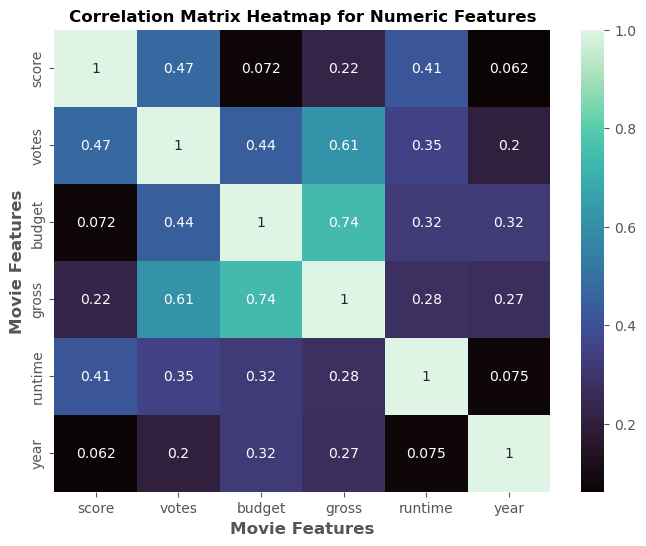

In [20]:
# Visualizing the correlation in a heatmap.

correlation_matrix = movies_df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='mako')

plt.title('Correlation Matrix Heatmap for Numeric Features', fontsize=12, fontweight='bold')

plt.xlabel('Movie Features', fontweight='bold')

plt.ylabel('Movie Features', fontweight='bold')

plt.show()

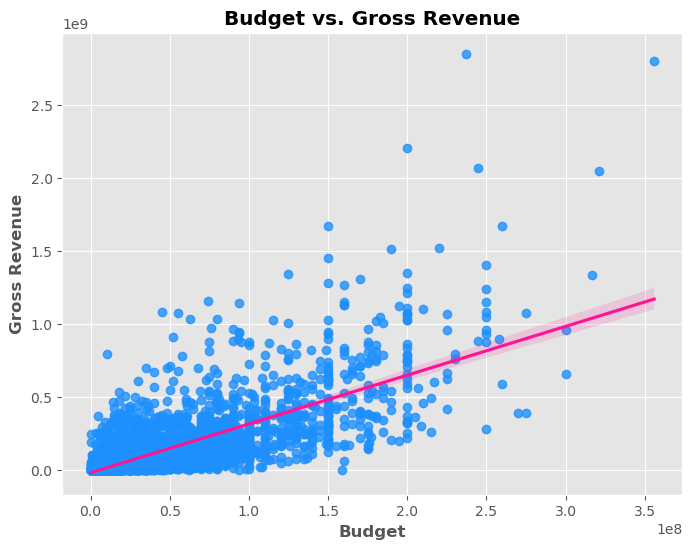

<Figure size 600x400 with 0 Axes>

In [21]:
# Budget vs Gross Revenue using Seaborn.

sns.regplot(x='budget', y='gross', data=movies_df, scatter_kws={'color': 'dodgerblue'}, 
            line_kws={'color':'deeppink'})

plt.title('Budget vs. Gross Revenue', fontweight='bold')
plt.xlabel('Budget', fontweight='bold')
plt.ylabel('Gross Revenue', fontweight='bold')
plt.figure(figsize=(6,4))

plt.show()


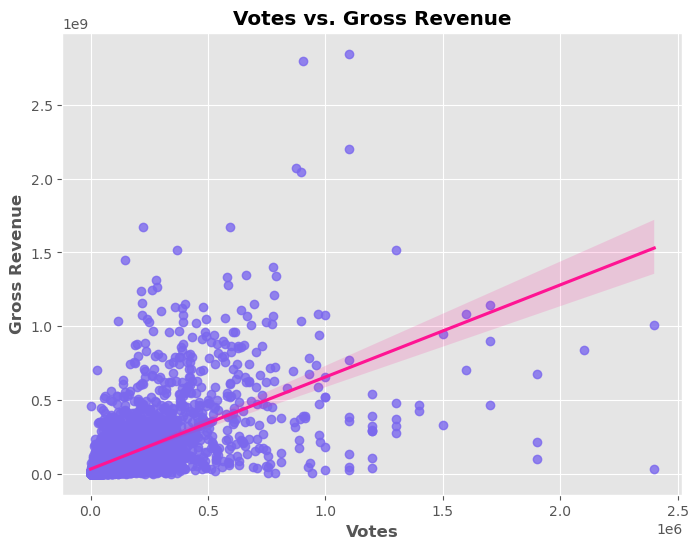

<Figure size 600x400 with 0 Axes>

In [22]:
# Votes vs Gross [Seaborn]

sns.regplot(x='votes', y='gross', data=movies_df, scatter_kws={'color':'mediumslateblue'},
           line_kws={'color':'deeppink'})

plt.title('Votes vs. Gross Revenue', fontweight='bold')
plt.xlabel('Votes', fontweight='bold')
plt.ylabel('Gross Revenue', fontweight='bold')
plt.figure(figsize=(6,4))
plt.show()

## Data Exploration

In [23]:
# Select data only from the years 2000-2020. 

selected_data = movies_df.loc[(movies_df['year'] >= 2000) & (movies_df['year'] <= 2020)]
selected_data.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
2394,Iron Monkey,PG-13,Action,"October 12, 2001 (United States)",7.5,16000,Woo-Ping Yuen,Tan Cheung,Rongguang Yu,Hong Kong,11000000,14694904,Film Workshop,85.0,2001
2551,The Legend of Drunken Master,R,Action,"October 20, 2000 (United States)",7.6,44000,Chia-Liang Liu,Edward Tang,Jackie Chan,Hong Kong,10000000,11555430,Golden Harvest Company,102.0,2000
3421,Edge of Seventeen,Not Rated,Comedy,"April 20, 2000 (Australia)",6.8,6000,David Moreton,Todd Stephens,Chris Stafford,United States,700000,871759,Blue Streak Films,99.0,2000
3438,Hell's Kitchen,R,Crime,"January 19, 2001 (Italy)",4.7,2500,Tony Cinciripini,Tony Cinciripini,Rosanna Arquette,United States,6000000,11710,HK Film Corporation,95.0,2001
3460,The Virgin Suicides,R,Drama,"May 19, 2000 (United States)",7.2,147000,Sofia Coppola,Jeffrey Eugenides,Kirsten Dunst,United States,9000000,10410044,American Zoetrope,97.0,2000


In [24]:
# Explore the Top 10 Companies in the years 2000-2020. 

top_10_companies = selected_data['company'].value_counts().head(10)

print(top_10_companies)

# for count, company in enumerate(top_10_companies.index, start=1):
#     print(f"Rank: {count}")
#     print(f"Company: {company}")
#     print(f"Number of movies: {top_10_companies[company]}")
#     print()

Universal Pictures       195
Warner Bros.             183
Columbia Pictures        181
Paramount Pictures       145
Twentieth Century Fox    130
New Line Cinema          104
Walt Disney Pictures      76
Dreamworks Pictures       64
Summit Entertainment      57
Screen Gems               55
Name: company, dtype: int64


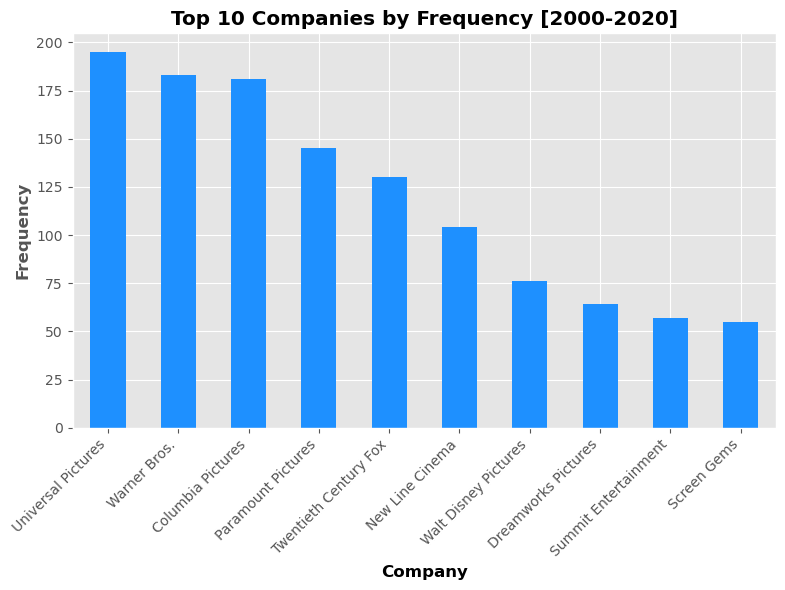

In [25]:
# Plot the previous output. 

plt.figure(figsize=(8, 6))
top_10_companies.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Companies by Frequency [2000-2020]', fontweight='bold')
plt.xlabel('Company', fontweight='semibold', color='black')
plt.ylabel('Frequency',fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

In [26]:
# Explore the Top 10 Movie Stars in the years 2000-2020. 

top_10_stars = selected_data['star'].value_counts().head(10)

print(top_10_stars)

# for count, star in enumerate(top_10_stars.index, start=1):
#     print(f'Rank: {count}')
#     print(f'Actor: {star}')
#     print(f'Number of Movies: {top_10_stars[star]}')
#     print()

Nicolas Cage           27
Denzel Washington      23
Adam Sandler           23
Matt Damon             22
Ben Stiller            22
Matthew McConaughey    22
Mark Wahlberg          22
Dwayne Johnson         22
Johnny Depp            21
Will Ferrell           20
Name: star, dtype: int64


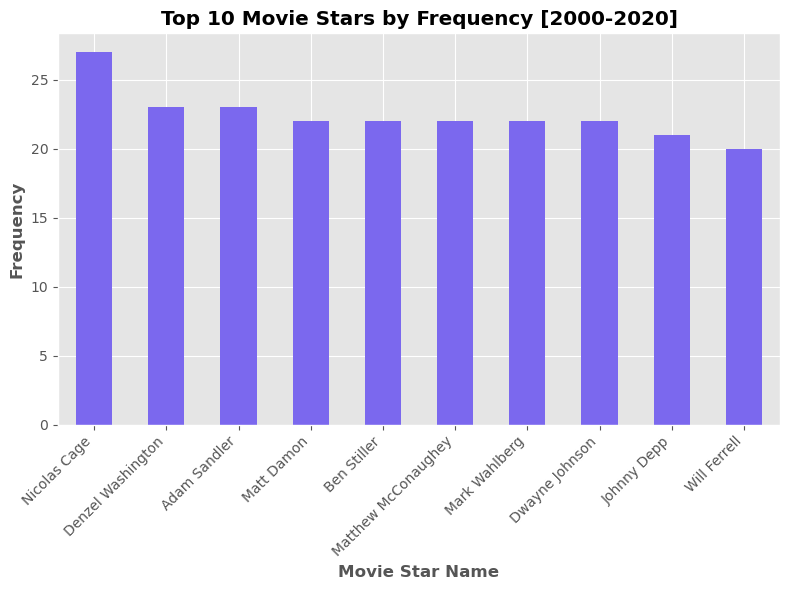

In [27]:
# Plot the previous output. 

plt.figure(figsize=(8,6))
top_10_stars.plot(kind='bar', color='mediumslateblue')
plt.title('Top 10 Movie Stars by Frequency [2000-2020]', fontweight='bold')
plt.xlabel('Movie Star Name', fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Explore the Top 10 Films based on votes. 

top_10_votes = selected_data.sort_values(by='votes', ascending=False)[['votes', 'name', 'year']].head(10)
top_10_votes

,votes,name,year
5243,2400000,The Dark Knight,2008
5643,2100000,Inception,2010
3845,1700000,The Lord of the Rings: The Fellowship of the Ring,2001
4245,1700000,The Lord of the Rings: The Return of the King,2003
6444,1600000,Interstellar,2014
6047,1600000,The Dark Knight Rises,2012
4048,1500000,The Lord of the Rings: The Two Towers,2002
3645,1400000,Gladiator,2000
6044,1400000,Django Unchained,2012
5443,1300000,Inglourious Basterds,2009


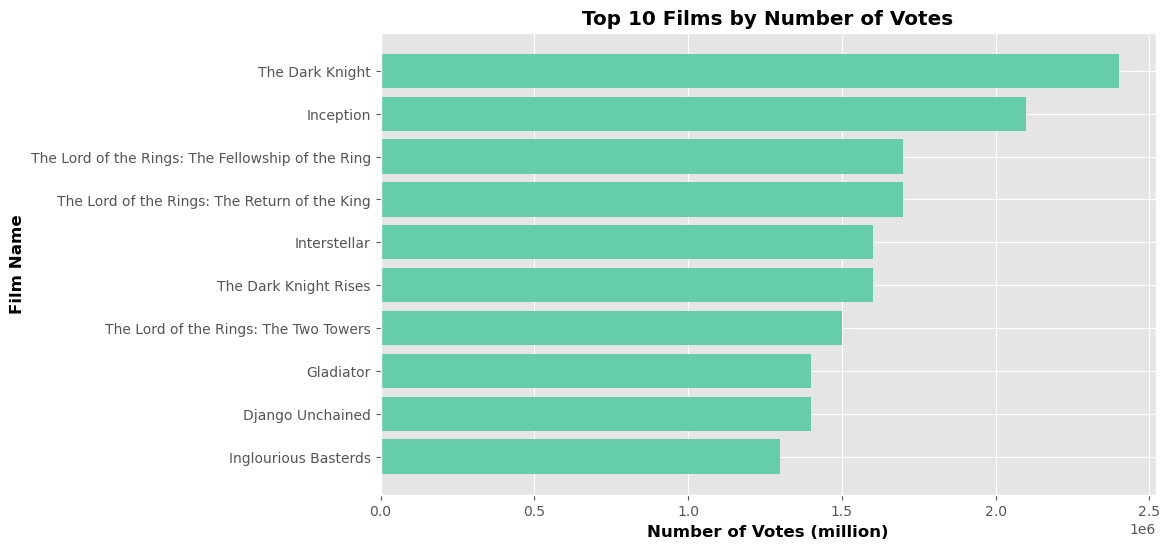

In [29]:
# Plot the previous output. 

plt.figure(figsize=(10, 6))
plt.barh(top_10_votes['name'], top_10_votes['votes'], color='mediumaquamarine', )
plt.xlabel('Number of Votes (million)', fontweight='bold', color='black')
plt.ylabel('Film Name', fontweight='bold', color='black')
plt.title('Top 10 Films by Number of Votes', fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the film with the highest votes at the top
plt.show()

In [30]:
# Average budget per year.

avg_budget_year = selected_data.groupby('year')['budget'].mean()
avg_budget_year

year
2000    3.952651e+07
2001    3.977893e+07
2002    3.791171e+07
2003    4.018363e+07
2004    4.354195e+07
2005    4.454897e+07
2006    4.255305e+07
2007    4.466603e+07
2008    4.387665e+07
2009    4.562015e+07
2010    4.783086e+07
2011    4.661041e+07
2012    4.827029e+07
2013    5.090248e+07
2014    4.489050e+07
2015    4.592347e+07
2016    5.253291e+07
2017    5.522466e+07
2018    4.939153e+07
2019    5.540702e+07
2020    8.799545e+07
Name: budget, dtype: float64

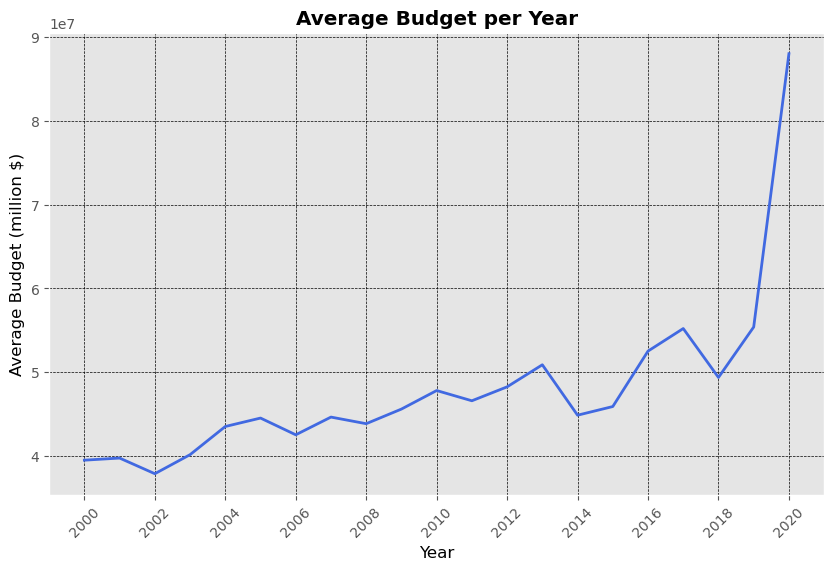

In [31]:
# Plot the previous output. 

plt.figure(figsize=(10,6))
avg_budget_year.plot(kind='line', color='royalblue', linewidth=2)
plt.title('Average Budget per Year', fontweight='semibold')
plt.xlabel('Year', color='black')
plt.ylabel('Average Budget (million $)', color='black')
plt.xticks(avg_budget_year.index[::2], rotation=45)
plt.grid(color='black', linestyle='--', linewidth=0.5)

plt.show()